# Исследование источников трафика Яндекс.Афиши.

Меня пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши.

Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Нам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчет-метрик-и-визуализация" data-toc-modified-id="Расчет-метрик-и-визуализация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет метрик и визуализация</a></span><ul class="toc-item"><li><span><a href="#Продуктовые-метрики" data-toc-modified-id="Продуктовые-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Продуктовые метрики</a></span><ul class="toc-item"><li><span><a href="#Расчет-DAU,-WAU-и-MAU" data-toc-modified-id="Расчет-DAU,-WAU-и-MAU-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Расчет DAU, WAU и MAU</a></span></li><li><span><a href="#Расчет-среднего-количества-посещений-в-день" data-toc-modified-id="Расчет-среднего-количества-посещений-в-день-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Расчет среднего количества посещений в день</a></span></li><li><span><a href="#Расчет-длительности-сессий" data-toc-modified-id="Расчет-длительности-сессий-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Расчет длительности сессий</a></span></li><li><span><a href="#Расчет-частоты-повторных-сессий" data-toc-modified-id="Расчет-частоты-повторных-сессий-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Расчет частоты повторных сессий</a></span></li></ul></li><li><span><a href="#Метрики-электронной-коммерции" data-toc-modified-id="Метрики-электронной-коммерции-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метрики электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Расчет-среднего-периода-от-первой-сессии-до-первой-покупки" data-toc-modified-id="Расчет-среднего-периода-от-первой-сессии-до-первой-покупки-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Расчет среднего периода от первой сессии до первой покупки</a></span></li><li><span><a href="#Расчет-среднего-количества-покупок-на-одного-покупателя" data-toc-modified-id="Расчет-среднего-количества-покупок-на-одного-покупателя-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Расчет среднего количества покупок на одного покупателя</a></span></li><li><span><a href="#Расчет-среднего-чека-по-месяцам" data-toc-modified-id="Расчет-среднего-чека-по-месяцам-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Расчет среднего чека по месяцам</a></span></li><li><span><a href="#Расчет-LTV-на-покупателя-по-когортам" data-toc-modified-id="Расчет-LTV-на-покупателя-по-когортам-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Расчет LTV на покупателя по когортам</a></span></li></ul></li><li><span><a href="#Маркетинговые-метрики" data-toc-modified-id="Маркетинговые-метрики-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Маркетинговые метрики</a></span><ul class="toc-item"><li><span><a href="#Расчет-общей-суммы-расходов-на-маркетинг" data-toc-modified-id="Расчет-общей-суммы-расходов-на-маркетинг-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Расчет общей суммы расходов на маркетинг</a></span></li><li><span><a href="#Расчет-суммы-расходов-на-маркетинг-на-каждый-источник" data-toc-modified-id="Расчет-суммы-расходов-на-маркетинг-на-каждый-источник-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Расчет суммы расходов на маркетинг на каждый источник</a></span></li><li><span><a href="#Расчет-суммы-расходов-на-маркетинг-по-времени:" data-toc-modified-id="Расчет-суммы-расходов-на-маркетинг-по-времени:-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Расчет суммы расходов на маркетинг по времени:</a></span></li><li><span><a href="#Расчет-стоимости-привлечения-одного-покупателя-из-каждого-источника" data-toc-modified-id="Расчет-стоимости-привлечения-одного-покупателя-из-каждого-источника-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Расчет стоимости привлечения одного покупателя из каждого источника</a></span></li><li><span><a href="#Расчет-ROMI-по-когортам-в-разрезе-источников" data-toc-modified-id="Расчет-ROMI-по-когортам-в-разрезе-источников-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Расчет ROMI по когортам в разрезе источников</a></span></li></ul></li></ul></li><li><span><a href="#Вывод-и-рекомендации" data-toc-modified-id="Вывод-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод и рекомендации</a></span></li></ul></div>

## Изучение данных из файла

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
%matplotlib inline

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Данные по визитам хорошие, пропусков нет, однако, столбцы с датами в формате "object" - требуют исправления, названия столбцов необходимо привести к одному виду - через "_" и в нижний регистр.

In [4]:
visits.duplicated().sum()

0

Дубликатов нет

In [5]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Данные по заказам хорошие, пропусков нет, необходим нижний регистр в названии столбцов, столбец с датами также в формате "object" - требует исправления, а в название столбца Buy Ts необходимо добавить "_".

In [7]:
orders.duplicated().sum()

0

Дубликатов нет

In [8]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


В данных по расходам также нет пропусков, а столбец с датами требует изменение типа на datetime.

In [10]:
costs.duplicated().sum()

0

Дубликатов нет

## Предобработка данных

### Преобразование данных

Приведем к нижнему регистру названия столбцов:

In [11]:
visits.columns = visits.columns.str.lower()
visits.columns

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

In [12]:
orders.columns = orders.columns.str.lower()
orders.columns

Index(['buy ts', 'revenue', 'uid'], dtype='object')

Заменим в названиях столбцов "пробел" на "_" там, где это необходимо:

In [13]:
visits.rename(columns={'end ts': 'end_ts', 'source id': 'source_id', 'start ts' : 'start_ts'}, inplace=True)
orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
print(visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


### Изменение типов данных

Изменим тип данных столбцов с датами:

In [14]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [15]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Вывод:** Типы данных столбцов с датами успешно изменены.

Проверим данные на соответствие заданному в условии временному интервалу:

In [17]:
visits.groupby('start_ts')['device'].count().to_frame().tail()

,device
start_ts,
2018-05-31 23:54:00,5
2018-05-31 23:56:00,1
2018-05-31 23:57:00,2
2018-05-31 23:58:00,1
2018-05-31 23:59:00,5


In [18]:
orders.groupby('buy_ts')['revenue'].count().to_frame().tail()

,revenue
buy_ts,
2018-05-31 23:43:00,1
2018-05-31 23:50:00,2
2018-05-31 23:54:00,1
2018-05-31 23:56:00,1
2018-06-01 00:02:00,1


In [19]:
costs.groupby('dt')['costs'].count().to_frame().tail()

,costs
dt,
2018-05-27,7
2018-05-28,7
2018-05-29,7
2018-05-30,7
2018-05-31,7


Мы видим, что таблицы visits и costs - соответствуют временному интервалу, а таблица orders имеет 1 покупку в июне 2018 г. Удалим её, чтобы она не смещала нам результаты:
    
    - проверим уникальность пользователя 83872787173869366, который соответствует этой покупке

In [20]:
orders.query('uid == "83872787173869366"')

,buy_ts,revenue,uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [21]:
orders = orders.query('uid != "83872787173869366"')
orders.tail()

,buy_ts,revenue,uid
50409,2018-05-31 23:43:00,3.67,1805512004303848280
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


**Вывод:** т.к пользователь был уникальным, то методом query() мы удалили лишнюю покупку и проверили результат.
    
**Общий вывод:** типы данных в столбцах с датами заменены успешно, проверено вхождение данных в указанный временной период, выявленное несоответствие в таблице orders (покупка в июне 2018 г.) успешно удалено.

## Расчет метрик и визуализация

### Продуктовые метрики

#### Расчет DAU, WAU и MAU

Сначала посчитаем недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [22]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits['session_day'] = visits['start_ts'].dt.day
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,27


Теперь рассчитаем сами метрики:

In [23]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean())

mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean())

print('Количество уникальных пользователей в среднем:')
print('в день', int(dau_total), 'чел.')
print('в неделю', int(wau_total), 'чел.')
print('в месяц', int(mau_total), 'чел.')

Количество уникальных пользователей в среднем:
в день 907 чел.
в неделю 5716 чел.
в месяц 23228 чел.


Посмотрим, как наши данные выглядят, чтобы определиться с визуализацией, также исключим метод mean().

In [24]:
display(visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}))

uid
session_year session_month       
2017         6              13259
             7              14183
             8              11631
             9              18975
             10             29692
             11             32797
             12             31557
2018         1              28716
             2              28749
             3              27473
             4              21008
             5              20701

Построим гистограмму, в которой объединим 2 столбца с датами

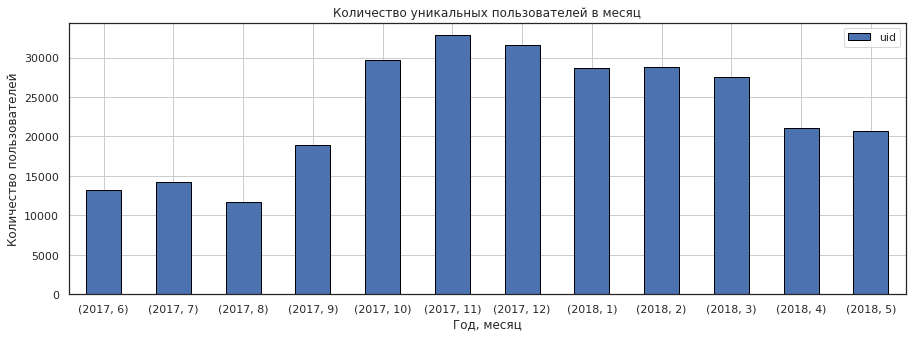

In [122]:
visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).plot(
    kind='bar', y='uid', figsize=(15,5), edgecolor='black'
)
plt.title('Количество уникальных пользователей в месяц')
plt.xticks(rotation=0)
plt.grid()
plt.xlabel('Год, месяц')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** по графику мы видим, что пользователи больше обращаются к сайту с октября по май, а летом спрос относительно меньше, скорей всего, это связано с периодом отпусков - многие выезжают загород где может не быть связи или в жаркие страны, в таком случае логично, что в этот период спрос на мероприятия типа кинотеатров будет меньше. Наибольший спрос в ноябре и декабре - видимо, сказывается грусть по теплу, когда за окном холодно и промозгло.

Теперь визуализируем данные по неделям:

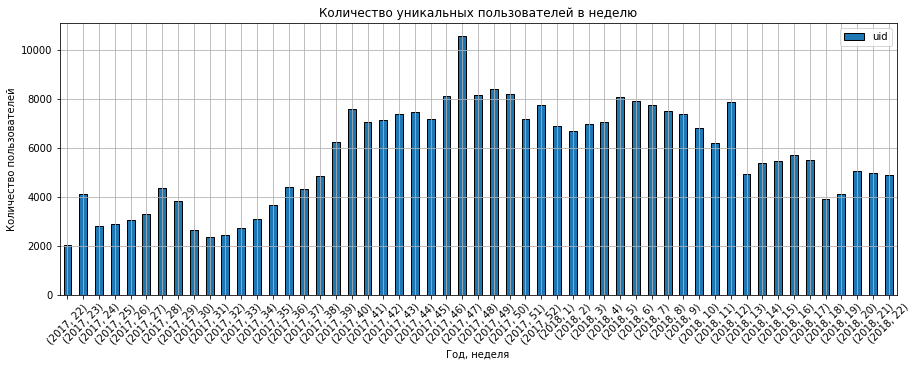

In [26]:
visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).plot(
    kind='bar', y='uid', figsize=(15,5), edgecolor='black'
)
plt.title('Количество уникальных пользователей в неделю')
plt.xticks(rotation=45)
plt.grid()
plt.xlabel('Год, неделя')
plt.ylabel('Количество пользователей')
plt.show()

**Вывод:** в целом, график подтверждает предыдущий вывод, только показывает более детально. Интересно, что ярко выделяется 47 неделя, можно предположить, на эту неделю (20-26 ноября) выпадали каникулы, а может, была проведена какая-то интересная акция, тогда вполне объясним такой взрыв интереса. Также стоит отметить, что на 52ю неделю 2017г и 1ю неделю января приходится относительный спад новых пользователей, по сравнению с остальным периодом подъема, возможно, это связано с тем, что у нас принято больше гулять на новогодних каникулах или уезжать загород, где не всегда есть связь. По такому же принципу можно объяснить спад количества новых пользователей на 18 и 19 неделях 2018 года - это период майских праздников, когда многие выезжают на природу, дачи.

Визуализируем данные по дням.

Из-за того, что информация по дням объемная, нам необходимо внести некоторые изменения. Для визуализации тут лучше всего подойдет тепловая карта, поэтому сгруппируем данные через pivot_table(). 

Посмотрим на получившуюся таблицу для того, чтобы удостовериться, что мы всё правильно распределили по интервалам и значениям.

In [27]:
vis_day = visits.pivot_table(index=['session_year', 'session_month'],
                  columns='session_day',
                  values='uid',
                  aggfunc='nunique')
vis_day

session_day                     1       2       3       4       5       6   \
session_year session_month                                                   
2017         6               605.0   608.0   445.0   476.0   820.0   797.0   
             7               361.0   330.0   594.0   511.0   519.0   578.0   
             8               410.0   360.0   397.0   347.0   280.0   282.0   
             9               572.0   472.0   499.0   654.0   728.0   777.0   
             10              848.0  1146.0  1190.0  1232.0  1226.0  1418.0   
             11             1237.0  1168.0  1144.0   943.0  1009.0  1047.0   
             12             1273.0  1040.0  1185.0  1432.0  1458.0  1377.0   
2018         1               992.0  1265.0  1219.0  1260.0  1006.0   915.0   
             2              1640.0  1378.0  1045.0  1007.0  1256.0  1200.0   
             3              1166.0  1253.0   962.0  1029.0  1209.0  1213.0   
             4                 NaN   641.0   942.0   938.0   912.0   911.0   
             5               489.0   496.0   803.0   745.0   565.0   580.0   

session_day                     7       8       9       10  ...      22  \
session_year session_month                                  ...           
2017         6               699.0   868.0   695.0   350.0  ...   537.0   
             7               542.0   389.0   444.0   685.0  ...   357.0   
             8               414.0   388.0   394.0   446.0  ...   502.0   
             9               782.0   832.0   511.0   506.0  ...   798.0   
             10             1117.0   901.0  1257.0  1143.0  ...  1001.0   
             11             1240.0  1201.0  1149.0  1197.0  ...  1255.0   
             12             1524.0  1411.0  1077.0  1130.0  ...  1148.0   
2018         1               831.0   903.0  1128.0  1142.0  ...  1266.0   
             2              1250.0  1417.0  1294.0  1189.0  ...  1200.0   
             3              1311.0  1025.0   984.0   908.0  ...  1369.0   
             4               730.0   729.0   958.0   901.0  ...   778.0   
             5               711.0   609.0   441.0   806.0  ...   886.0   

session_day                     23      24      25      26      27      28  \
session_year session_month                                                   
2017         6               446.0   328.0   383.0   564.0   489.0   552.0   
             7               322.0   554.0   439.0   425.0   465.0   362.0   
             8               529.0   485.0   502.0   409.0   422.0   602.0   
             9               635.0   662.0   984.0   980.0   951.0  1079.0   
             10             1257.0  1204.0  1114.0  1129.0  1187.0  1020.0   
             11             1433.0  3319.0  1817.0  1346.0  1571.0  1493.0   
             12              874.0   972.0  1372.0  1370.0  1334.0  1377.0   
2018         1              1153.0  1118.0  1224.0  1120.0   959.0   918.0   
             2               981.0  1062.0  1031.0  1411.0  1195.0  1073.0   
             3              1146.0  1093.0  1545.0  1609.0  1551.0   981.0   
             4              1006.0   905.0   887.0   944.0   830.0   799.0   
             5               811.0   833.0   821.0   602.0   620.0  1039.0   

session_day                     29      30      31  
session_year session_month                          
2017         6               546.0   439.0     NaN  
             7               307.0   311.0   476.0  
             8               579.0   600.0   652.0  
             9              1074.0   847.0     NaN  
             10             1127.0  1308.0  1259.0  
             11             1296.0  1409.0     NaN  
             12             1192.0  1106.0   732.0  
2018         1              1319.0  1282.0  1240.0  
             2                 NaN     NaN     NaN  
             3              1037.0   131.0     1.0  
             4               635.0   515.0     NaN  
             5               948.0  1289.0  1997.0  

[12 rows x 31 column

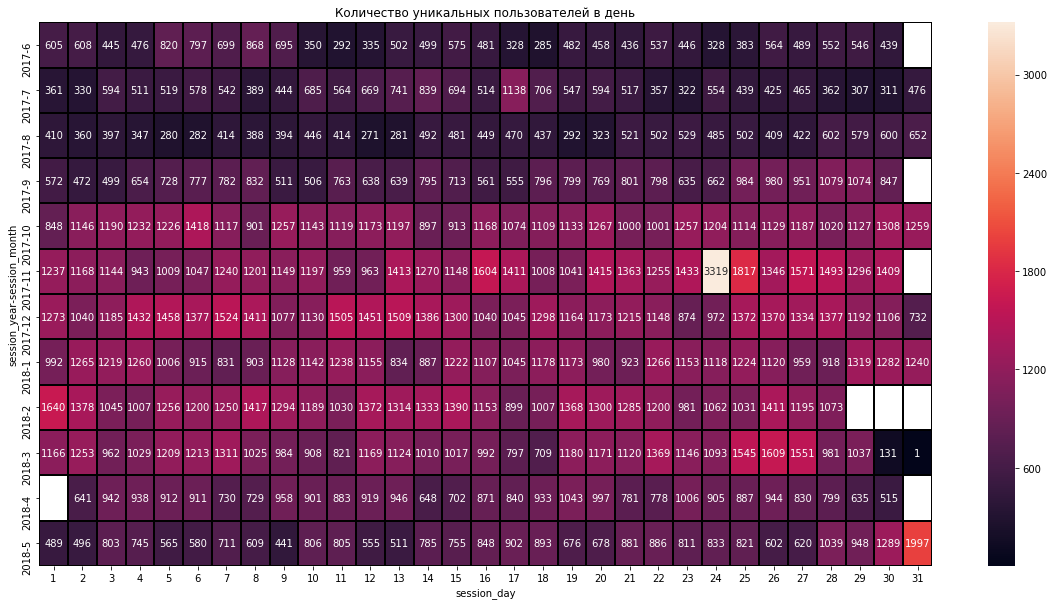

In [28]:
plt.figure(figsize=(20, 10))
plt.title('Количество уникальных пользователей в день')
sns.heatmap(vis_day, annot=True, fmt='.0f', linewidths=1, linecolor='black');

**Вывод:** на графике мы видим 1 яркий день - 24 ноября, неизвестно, что это было, можно только предположить, что это какая-то акция или "ночь кино".

Обращает на себя внимание то, что на графике прослеживается тенденция - 2 дня - чуть ниже спрос, далее 5 дней чуть выше, напрмер 11 и 12 ноября, затем через 5 дней - 18 и 19 ноября, 13 и 14 января и тд. Если свериться с календарем, то это выходные. Таким образом, можно предположить, что в выходные, в среднем, новых пользователей чуть меньше, чем в будни.

#### Расчет среднего количества посещений в день

Сначала посчитаем среднее за день в общем:

In [29]:
visits.groupby('session_date').agg({'start_ts' : 'count'}).mean()

start_ts    987.362637
dtype: float64

В среднем 987.36 сессий в день.

Посчитаем сколько уникальных пользователей заходят на сайт в каждую дату и сколько за день осуществляется входов. 

In [30]:
cohort_grouped = visits.groupby('session_date').agg(
    {'start_ts': 'count', 'uid': 'nunique'})
print(cohort_grouped.head()) 

              start_ts  uid
session_date               
2017-06-01         664  605
2017-06-02         658  608
2017-06-03         477  445
2017-06-04         510  476
2017-06-05         893  820


Теперь найдем среднее количество заходов на сайт для каждого пользователя:

In [31]:
cohort_grouped['d_mean'] = round(cohort_grouped['start_ts'] / cohort_grouped['uid'], 2)
cohort_grouped.head()

,start_ts,uid,d_mean
session_date,,,
2017-06-01,664,605,1.10
2017-06-02,658,608,1.08
2017-06-03,477,445,1.07
2017-06-04,510,476,1.07
2017-06-05,893,820,1.09


In [32]:
print('Среднее число сессий за весь период:', (cohort_grouped['d_mean'].mean()).round(2))

Среднее число сессий за весь период: 1.08


В среднем, пользователь заходит на сайт за весь период 1,08 раз в день.

Построим график изменения метрики в периоде:

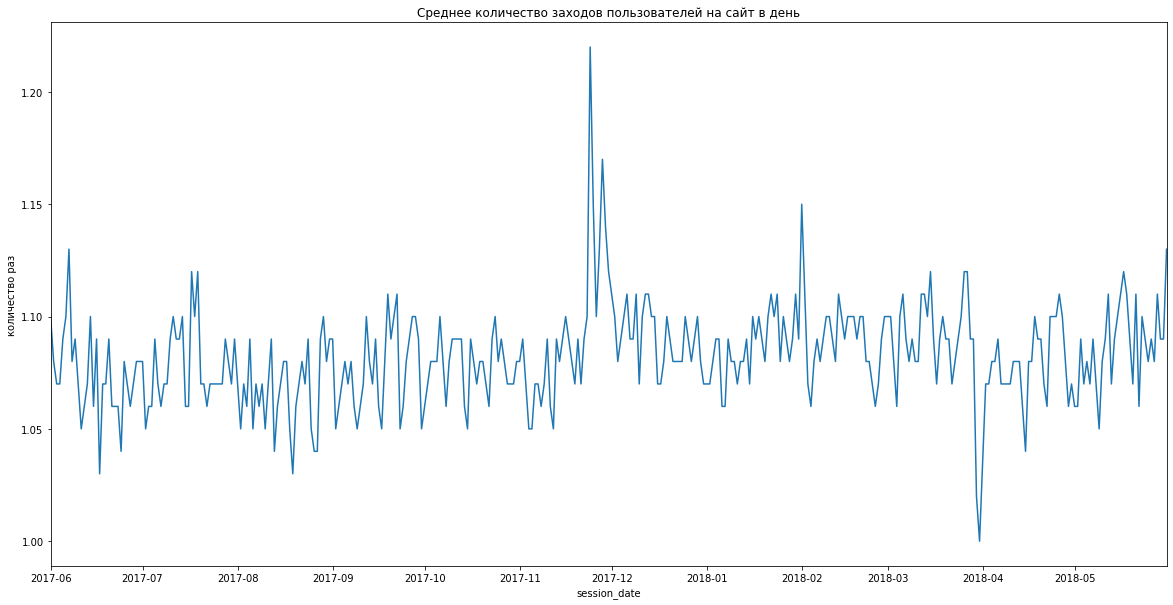

In [33]:
plt.figure(figsize=(20, 10))
plt.grid()
plt.title('Среднее количество заходов пользователей на сайт в день')
plt.xlabel('дата')
plt.ylabel('количество раз')
cohort_grouped['d_mean'].plot();

**Вывод:** по графику можно сделать такой - в среднем, пользователи заходят на сайт около 1 раза в день, для нашего сайта это не так уж плохо.

В декабре мы видим пик спроса, связанный вероятно с предновогодними шоу, а провал в апреле, видимо связан с временными системными неполадками на сайте или на отдельной платформе, т.к. провал уходит не в "0", а спускается до 1 посещения в день, значит посещения в этот период всё же были.

#### Расчет длительности сессий

Посчитаем дительность всех сессий:

In [34]:
visits['duration'] = ((visits['end_ts'] - visits['start_ts']).dt.seconds) / 60
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_day,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,27,0.0


Посмотрим информацию по данным и построим график для лучшей визуализации:

In [35]:
visits['duration'].describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: duration, dtype: float64

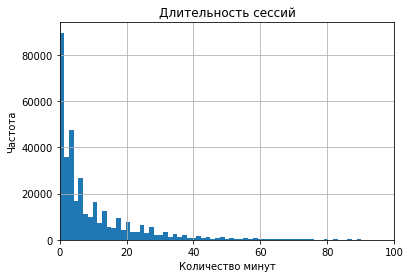

In [36]:
visits['duration'].hist(bins=1000)
plt.xlim(0, 100)
plt.xlabel('Количество минут')
plt.ylabel('Частота')
plt.title('Длительность сессий');

Анализ данных методом describe() говорит нам, что среднее - 10,7 минут, медиана - 5 минут - это слишком большое различие. Визуальное отображение показывает, что такая разница в показателях возникает из-за невысокого, но продолжительного смещения вправо, другими словами, есть пользователи с длительными сессиями, их не так много, но значения достаточно большие, чтобы смещать и среднее и медиану. Из-за этого нам требуется дополнительное исследование - мы найдем "моду":

Проведем тест Шапиро-Уилка (определим нормальность распределения):

In [37]:
from scipy import stats
val, p = stats.shapiro(visits['duration'])
print(p)

0.0


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Полученные данные говорят в пользу того, что распределение не явлется нормальным (p<0,05).
    
Тип распределения асимметричное правостороннее.

In [39]:
print('Мода:', visits['duration'].mode()[0])

Мода: 1.0


Мода, совместно с графиком показывают нам, что очень большое количество сессий (около 90 000 из 359 400) длятся примерно 1 минуту. Исходя из этого, сделаем вывод, что типичная пользовательская сессия длится 1 минуту.

**Вывод:** Учитывая, что мы рассматриваем сайт Яндекс.Афиша, который предполагает выбор мероприятия, то можно сделать вывод, что сессии длительностью 1 минуту подразумевают переход пользователя с последующей оплатой уже выбранного мероприятия, т.к вряд-ли можно сделать изначальный выбор в течение минуты. График, медиана и среднее, говорят о том, что в среднем пользователи проводят на сайте от 5 до примерно 15 минут, значит можно сказать, что средняя пользовательская сессия, подразумевающая выбор мероприятия непосредственно на данном сайте, будет около 11 минут.

#### Расчет частоты повторных сессий

Отсортируем пользователей по первой дате сессии.

In [40]:
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Переименуем название столбцов и присоединим полученную таблицу к основной по визитам.

In [41]:
first_visit.columns = ['uid', 'first_visit']
visits = visits.merge(first_visit, on = 'uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_day,duration,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20,18.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19,28.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20,24.0,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,9,28.0,2018-03-09 20:05:00


Добавим в таблицу необходимые для расчетов столбцы - выделим месяцы из столбцов 'first_visit' и 'start_ts':

In [42]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_day,duration,first_visit,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,9,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01


Сгруппируем когорты по первому визиту и оценим показатели:

In [43]:
cohorts = visits.groupby('first_visit_month').agg({'uid':'nunique'}).reset_index()
cohorts

,first_visit_month,uid
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977
5,2017-11-01,27248
6,2017-12-01,25268
7,2018-01-01,22624
8,2018-02-01,22197
9,2018-03-01,20589


С октября по март уникальных пользователей значительно больше, чем в остальное время.

Теперь посчитаем lifetime 

In [44]:
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_day,duration,first_visit,first_visit_month,visit_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,20,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,19,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,1,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,20,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,9,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый месяц:

In [45]:
user_chek = visits.groupby(['first_visit_month','lifetime']).agg({'uid':'nunique'}).reset_index()
user_chek

,first_visit_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Найдем исходное число пользователей:

In [46]:
users_count = user_chek[user_chek['lifetime'] == 0][['first_visit_month','uid']]
users_count = users_count.rename(columns = {'uid':'cohort_users'})
users_count

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Объединим данные по когортам с исходным количеством пользователей в когорте:

In [47]:
user_chek = user_chek.merge(users_count, on='first_visit_month')

user_chek.head()

,first_visit_month,lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Рассчитаем Retention Rate:

In [48]:
user_chek['retention'] = user_chek['uid'] / user_chek['cohort_users']

user_chek.head()

,first_visit_month,lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Обрежем дату первого посещения до месяца для удобства визуализации:

In [49]:
user_chek['first_visit_month'] = user_chek['first_visit_month'].dt.strftime('%Y-%m')
user_chek['first_visit_month'].head()

0    2017-06
1    2017-06
2    2017-06
3    2017-06
4    2017-06
Name: first_visit_month, dtype: object

Построим сводную таблицу:

In [50]:
retention_pivot = user_chek.pivot_table(index='first_visit_month',
                                      columns='lifetime',
                                      values='retention',
                                      aggfunc='sum')
retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим тепловую карту:

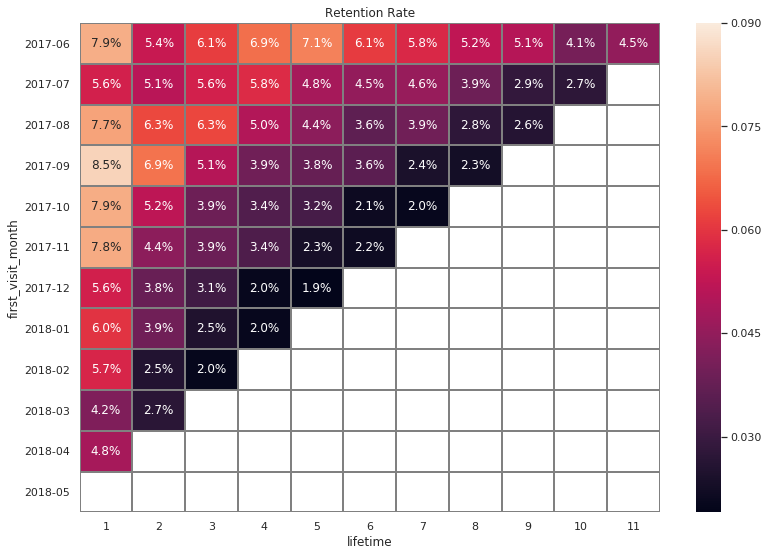

In [51]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')

sns.heatmap(retention_pivot.drop(0, axis=1), 
            annot=True,
            vmax=.09,
            fmt='.1%',
            linewidths=1, 
            linecolor='gray');

In [52]:
print('Средний Retention Rate на второй месяц «жизни» когорт:', round(retention_pivot[1].mean(), 3))

Средний Retention Rate на второй месяц «жизни» когорт: 0.065


**Вывод:** В целом можно сказать, что процент возвращения посетителей очень мал - не больше 9%, т.е люди довольно редко возвращаются, также мы видим, что в первой когорте (июньской) процент возвращений хоть и снижается, однако, он относительно стабилен. А в остальных когортах процент возврата снижается сильнее до 2-2,5%, т.е в половину ниже, чем в первой когорте. Еще можно сказать, что в марте и апреле даже в первый месяц, процент возвращений ниже, чем в остальных когортах, это может быть связано с какими-то неверными решениями, например, выбором рекламного источника.

### Метрики электронной коммерции

#### Расчет среднего периода от первой сессии до первой покупки

Посчитаем минимальную дату визита по пользователям

In [53]:
visits_for_buy = visits.groupby('uid')['start_ts'].min().reset_index()
visits_for_buy.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Посчитаем дату первой покупки по пользователям:

In [54]:
first_buy = orders.groupby('uid')['buy_ts'].min().reset_index()
first_buy.head()

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Переименуем столбцы и объединим таблицы. Присоединять будем к меньшей, т.к в данном случае нас интересует наличие покупки.

In [55]:
visits_for_buy.columns = ['uid', 'first_visit']
first_buy.columns = ['uid', 'first_buy']
first_buy = first_buy.merge(visits_for_buy, on = 'uid')
first_buy.head()

,uid,first_buy,first_visit
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Посчитаем время в секундах от начала сессии до покупки:

In [56]:
first_buy['buy_date'] = (first_buy['first_buy'] - first_buy['first_visit']).dt.seconds / 60
first_buy.head()

,uid,first_buy,first_visit,buy_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


Проверим, чтобы пользователи не дублировались:

In [57]:
first_buy['uid'].nunique()

36522

Посчитаем моду, медиану и среднее, чтобы определиться с дальнейшими действиями

In [58]:
print(first_buy['buy_date'].mode())
first_buy['buy_date'].describe()

0    1.0
dtype: float64


count    36522.000000
mean       249.171431
std        429.746738
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: buy_date, dtype: float64

Мода = 1 мин., а мы помним, что довольно много пользователей используют сервис только для оплаты, вероятно - это они. Среднее 249 мин., а медиана 16 мин.

Визуализируем с подбором корзин (=100):

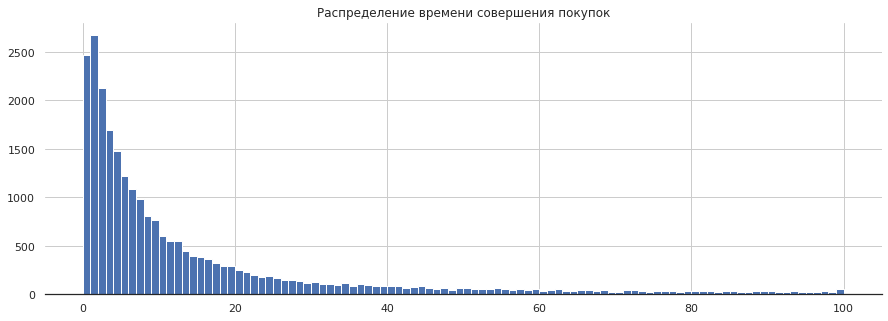

In [59]:
plt.figure(figsize=(15, 5))
first_buy['buy_date'].hist(bins=100, range=(0, 100))
sns.despine(left=True)
plt.title('Распределение времени совершения покупок')
plt.show()

График показывает, что в основном, покупают сразу, однако, хочется посмотреть подробнее, поэтому усечем данные до 100 и посмотрим еще раз.

**Вывод:** В таком представлении можем сделать вывод, что покупают в первые минут 15, а далее показатели уверенно снижаются и распределение смещается длинным хвостом вправо.

- Тип распределения асимметричный правосторонний.
- Мода - 1 мин.
- Среднее - 249 мин.
- Медиана 16 мин.
    
**Вывод:** на основании графика, а также полученных выше величин, можно сказать, что:
- при переходе с целью совершения покупки при сделанном ранее выборе мероприятия, пользователю требуется около 1 минуты;
- при переходе на сайт с последующим выбором мероприятия и его оплатой, в среднем требуется около 16 минут.

#### Расчет среднего количества покупок на одного покупателя

Выведем таблицу:

In [60]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Выделим месяц из даты совершения покупки:

In [61]:
orders['buy_month'] = orders['buy_ts'].dt.month
orders.head()

,buy_ts,revenue,uid,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,6


Посчитаем сколько всего совершается покупок по пользователям за весь период:

In [62]:
purchases = orders.groupby(['uid', 'buy_month'])['revenue'].count().mean()
purchases

1.2290701643181043

**Вывод:** В среднем, пользователи за весь период совершают чуть больше 1 покупки.

Выделим необходимые столбцы из таблицы (uid, first_buy) через .copy() и создадим новую таблицу:

In [63]:
first_buyers = first_buy[['uid', 'first_buy']].copy()
first_buyers.head()

,uid,first_buy
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Соединим полученную таблицу с таблицей с покупками:

In [64]:
orders_buy = orders.merge(first_buyers, on='uid')
orders_buy.head()

,buy_ts,revenue,uid,buy_month,first_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017-06-01 07:58:00


Приведем к типу datetime64[M] столбцы с датами и вычислим lifetime, округлим до целого числа.

In [65]:
orders_buy['buy_ts'] = orders_buy['buy_ts'].astype('datetime64[M]')
orders_buy['first_buy'] = orders_buy['first_buy'].astype('datetime64[M]')

orders_buy['lifetime'] = ((orders_buy['buy_ts'] - orders_buy['first_buy']) / np.timedelta64(1,'M'))
orders_buy['lifetime'] = orders_buy['lifetime'].round().astype('int')
orders_buy.head()

,buy_ts,revenue,uid,buy_month,first_buy,lifetime
0,2017-06-01,17.00,10329302124590727494,6,2017-06-01,0
1,2017-06-01,0.55,11627257723692907447,6,2017-06-01,0
2,2017-06-01,0.37,17903680561304213844,6,2017-06-01,0
3,2017-06-01,0.55,16109239769442553005,6,2017-06-01,0
4,2017-06-01,0.37,14200605875248379450,6,2017-06-01,0


Сгруппируем таблицу заказов по месяцу первой покупки и lifetime, посчитаем количество пользователей и количество уникальных пользователей.

In [66]:
cohorts_buy = (orders_buy.groupby(
    ['first_buy', 'lifetime']).agg(
    {'uid': ['count', 'nunique']})).reset_index()

cohorts_buy.columns = ['first_buy', 'lifetime', 'uid_count', 'uid_unique']
cohorts_buy.head()

,first_buy,lifetime,uid_count,uid_unique
0,2017-06-01,0,2354,2023
1,2017-06-01,1,177,61
2,2017-06-01,2,174,50
3,2017-06-01,3,226,54
4,2017-06-01,4,292,88


Найдем исходное число пользователей:

In [67]:
users = cohorts_buy[cohorts_buy['lifetime'] == 0][['first_buy', 'uid_unique']]
users.head()

,first_buy,uid_unique
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340


Объединим данные по когортам с исходным количеством пользователей в когорте:

In [68]:
cohorts_buy = pd.merge(cohorts_buy, users, on='first_buy')
cohorts_buy.head()

,first_buy,lifetime,uid_count,uid_unique_x,uid_unique_y
0,2017-06-01,0,2354,2023,2023
1,2017-06-01,1,177,61,2023
2,2017-06-01,2,174,50,2023
3,2017-06-01,3,226,54,2023
4,2017-06-01,4,292,88,2023


Сделаем итоговые расчеты и составим таблицу методом pivot_table(). Построим тепловую карту на основе полученной таблицы, обрежем дату для удобства визуализации.

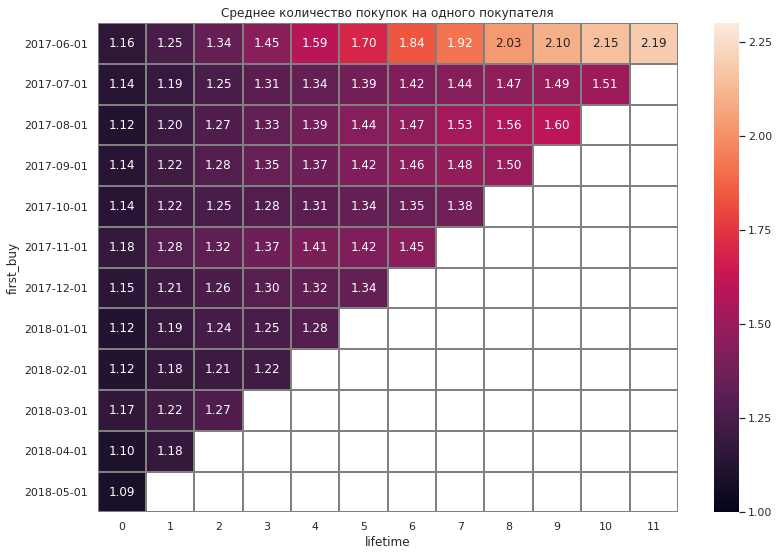

In [69]:
cohorts_buy['cohort_users'] = cohorts_buy['uid_count'] / cohorts_buy['uid_unique_y']

report = cohorts_buy.pivot_table(index='first_buy',
                                 columns='lifetime', 
                                 values='cohort_users', 
                                 aggfunc='sum')
report = report.cumsum(axis=1).round(2)

plt.figure(figsize=(13, 9))
ax = sns.heatmap(report,
                 annot=True,
                 vmin=1,
                 vmax=2.3,
                 fmt='.2f', 
                 linewidths=1,
                 linecolor='gray')
                 
ax.set_yticklabels(report.index.date)
plt.title('Cреднее количество покупок на одного покупателя')
plt.show();

In [70]:
orders_mean = (report[5].mean()).round(2)
print('Cреднее количество покупок на одного покупателя за 6 мес.:', orders_mean)

Cреднее количество покупок на одного покупателя за 6 мес.: 1.44


**Вывод:**
- среднее количество покупок на одного пользователя по когортам с течением времени возрастает.
- самая перспективная когрта - июньская - в четвертом квартале её показатели в среднем - 2 покупки на пользователя.
- среднее количество покупок на одного покупателя за 6 мес.: 1.44

#### Расчет среднего чека по месяцам

Обрежем дату покупки до месяца для удобства визуализации:

In [71]:
orders['buy_ts_month'] = orders['buy_ts'].dt.strftime('%Y-%m')
orders['buy_ts_month'].head()

0    2017-06
1    2017-06
2    2017-06
3    2017-06
4    2017-06
Name: buy_ts_month, dtype: object

Сгруппируем данные по месяцу совершения покупки и найдем средний чек

In [72]:
purchases_mean = orders.groupby('buy_ts_month').agg({'revenue': 'mean'})
purchases_mean

,revenue
buy_ts_month,
2017-06,4.060106
2017-07,5.306589
2017-08,4.847139
2017-09,5.416448
2017-10,4.928280
2017-11,4.783518
2017-12,5.852139
2018-01,4.112927
2018-02,4.840095


In [73]:
print('Средний чек за весь период:', (purchases_mean['revenue'].mean()).round(2))

Средний чек за весь период: 4.96


Построим график по месяцам:

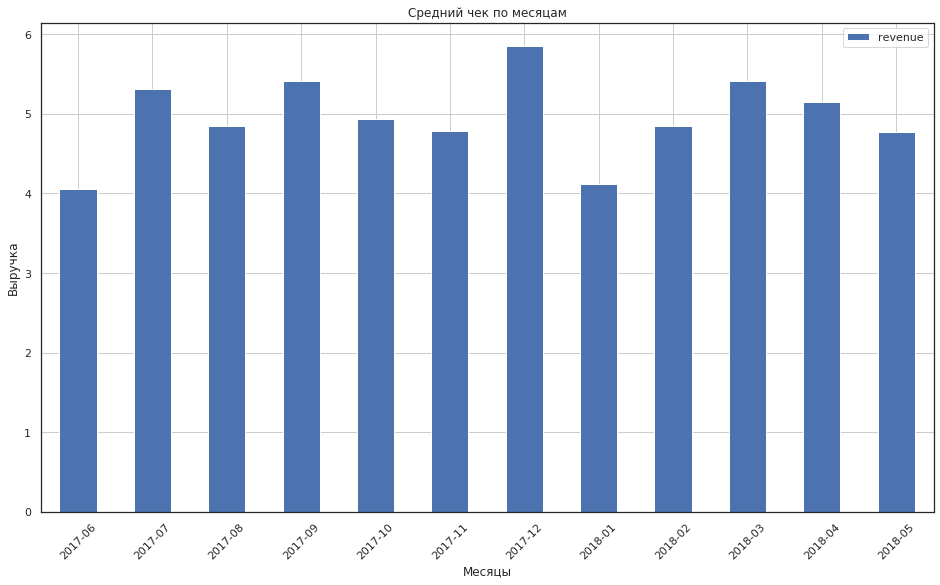

In [74]:
ax = purchases_mean.plot(kind='bar', figsize=(16, 9))
plt.title('Средний чек по месяцам')
plt.grid()
plt.xticks(rotation=45)
ax.set_xlabel('Месяцы')
ax.set_ylabel('Выручка')
plt.show()

На графике не прослеживается четких закономерностей по месяцам, однако, можно сказать, что в декабре выручка была самой высокой, возможно это говорит о спросе на предновогодние шоу.

In [75]:
purchases_mean['revenue'].describe()

count    12.000000
mean      4.956925
std       0.521265
min       4.060106
25%       4.780459
50%       4.887709
75%       5.333424
max       5.852139
Name: revenue, dtype: float64

**Вывод:** в среднем, пользователи тратят 4,8 у.е, а больше всего к новому году.

Самая низкая выручка наблюдается в июне 2017 года - это говорит о том, что в начале лета люди чаще стремятся в отпуска, а значит выезжают за пределы города - снижается спрос на мероприятия. Примерно то, же можно сказать о снижении выручки за январь 2018 года - это может быть за счет периода январских каникул, когда пользователи отдыхают за пределами города либо в связи с финансовыми трудностями, т.к потратились на предновогодние мероприятия, новогодние подарки и праздники.

#### Расчет LTV на покупателя по когортам

т.к. данные у нас за год, удобнее всего сформировать месячные когорты. Выделим месяцы

In [76]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

Получим месяц первой покупки каждого покупателя:

In [77]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [78]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index())

cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [79]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,buy_month,buy_ts_month,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017-06,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017-06,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017-06,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017-06,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017-06,2017-06-01,2017-06-01


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.

In [80]:
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())

cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [81]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


- По условиям задачи - маржинальность = 100%.
- Найдем валовую прибыль.
- Создадим столбец с возрастом когорты.

In [82]:
margin_rate = 1.0

report['gp'] = report['revenue'] * margin_rate

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')

report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


Найдём LTV:

In [124]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(index='first_order_month', 
                            columns='age', 
                            values='ltv', 
                            aggfunc='mean').round(2)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


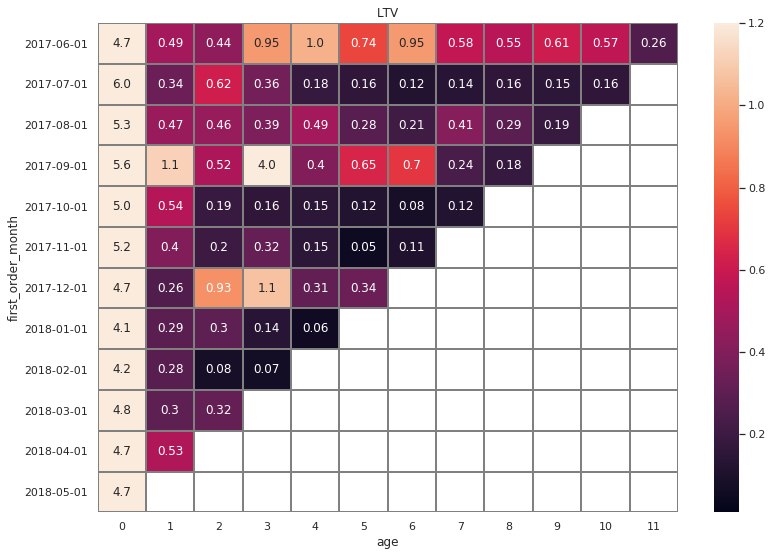

In [84]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')

ax=sns.heatmap(output, 
            annot=True,
            vmin=0.01,
            vmax=1.2,
            fmt='.2',
            linewidths=1, 
            linecolor='gray')
ax.set_yticklabels(output.index.date);

Визуализировали LTV с подбором vmin и vmax.
    
Судя по карте, можно сказать, что в 1, 4 и 7 когортах наблюдается повышенный спрос на услуги сайта в 4й месяц жизни, если перевести на календарь, то получим сентябрь - для 1й когорты, предновогодний период для 4й когорты и март для 7 когорты - похоже на проведение праздничных акций, посвященных началу учебного года (или окончание отпусков), предстоящему новому году и 8 марта соответственно.

Рассчитаем средний LTV по когортам за 6 месяцев и построим график.

        Data    Val
0 2017-06-01   8.36
1 2017-07-01   7.67
2 2017-08-01   7.37
3 2017-09-01  12.31
4 2017-10-01   6.16
5 2017-11-01   6.27


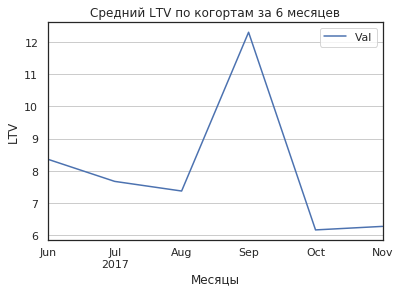

In [85]:
sul=pd.DataFrame()
for i in range(6):
    su=output.iloc[i, 0:6].sum()
    sul.loc[i,'Data']=output.index[i]
    sul.loc[i,'Val']=su
print(sul)
 
sul.plot('Data', 'Val')
plt.title('Средний LTV по когортам за 6 месяцев')
plt.grid()
plt.xlabel('Месяцы')
plt.ylabel('LTV'); 

**Вывод:** на графике видим, что наиболее прибыльная по среднему чеку сентябрьская когорта 12,31 у.е, в остальных, в среднем, пользователи приносят около 7 у.е за 6 месяцев.

Рассчитаем LTV методом cumsum(), т.к метрика является накопительной:

In [86]:
ltv = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv')

ltv = ltv.cumsum(axis=1)
ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


Визуализируем LTV на тепловой карте с подбором : vmin=3, vmax=13.5

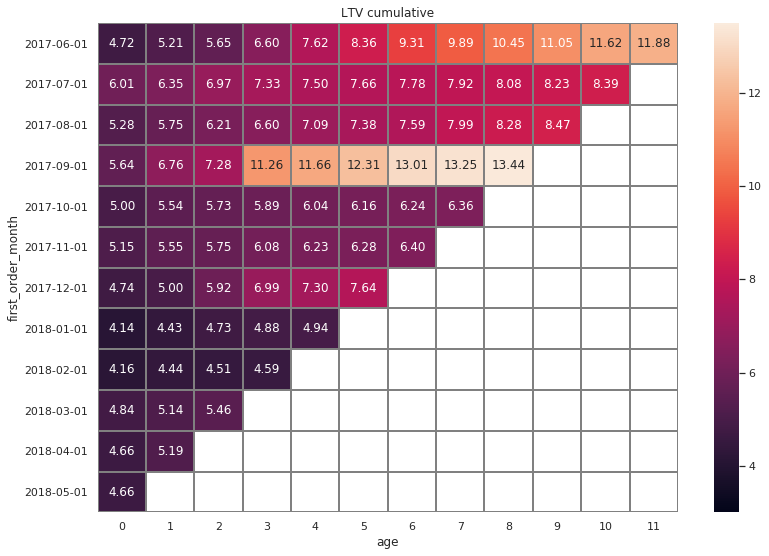

In [87]:
plt.figure(figsize=(13,9))
plt.title('LTV cumulative')
ax = sns.heatmap(ltv,
                 annot=True,
                 vmin=3,
                 vmax=13.5,
                 fmt='.2f', 
                 linewidths=1,
                 linecolor='gray')

ax.set_yticklabels(output.index.date)
plt.show()

In [88]:
ltv_mean_6m = output.cumsum(axis=1).mean(axis=0)[5].round(2)
print('Средний LTV по когортам за 6 месяцев:', ltv_mean_6m, 'у.е')

Средний LTV по когортам за 6 месяцев: 7.97 у.е


- Средний LTV по когортам за 6 месяцев: 7.97 у.е
- На карте обращает на себя внимание:
    - 1 когорта - её значения стабильно повышаются
    - 4 когорта - самый высокий LTV с декабря 2017 года и далее стабильно растет
    - 7 когорта - она меньше выделяется, чем первые две, однако имеет прирост LTV чуть выше, чем остальные когорты
    - остальные когорты, в среднем имеют стабильный, хоть и невысокий прирост LTV

### Маркетинговые метрики

#### Расчет общей суммы расходов на маркетинг

Посмотрим на таблицу:

In [89]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [90]:
costs_tot = costs['costs'].sum()
print('Всего потрачено', costs_tot, "у.е.")

Всего потрачено 329131.62 у.е.


#### Расчет суммы расходов на маркетинг на каждый источник

In [91]:
costs_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Построим круговую диаграмму для лучшей визуализации:

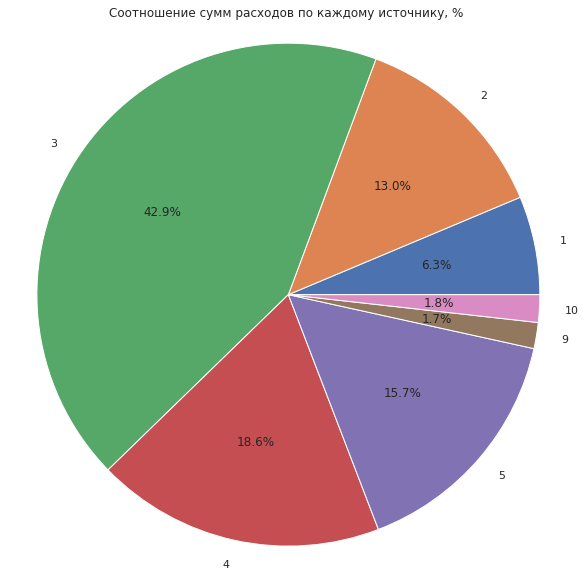

In [92]:
labels = costs_source['source_id']
values = costs_source['costs']
plt.figure(figsize=(10, 10))
plt.title('Соотношение сумм расходов по каждому источнику, %')
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Вывод:** На графике видно, что основной источник - 3 (42,9% от общей суммы расходов), а самые маленькие 10 и 9 (меньше 2% от общей суммы).

#### Расчет суммы расходов на маркетинг по времени:

Обрежем дату до месяца для удобства визуализации:

In [93]:
costs['dt_month'] = costs['dt'].dt.strftime('%Y-%m')
costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


- Сгруппируем данные по источнику и посчитаем суммарные расходы в каждом месяце.
- Визуализируем на линейном графике.

In [94]:
costs_time = costs.pivot_table(index='source_id',
                  columns='dt_month',
                  values='costs',
                  aggfunc='sum')
costs_time

dt_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


In [95]:
costs_time_new = costs_time.mean()
costs_time_new = (costs_time_new).round(2)
costs_time_new

dt_month
2017-06    2573.57
2017-07    2605.80
2017-08    2112.93
2017-09    3481.27
2017-10    5188.98
2017-11    5415.41
2017-12    5473.62
2018-01    4788.36
2018-02    4674.72
2018-03    4345.04
2018-04    3184.20
2018-05    3174.90
dtype: float64

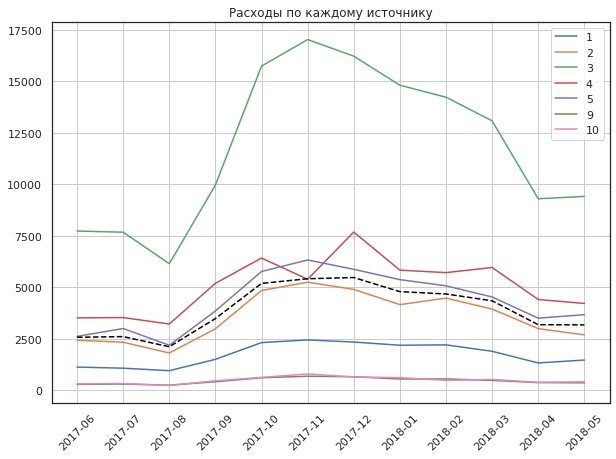

In [96]:
plt.figure(figsize=(10,7))
for i in range(costs_time.shape[0]):
    plt.plot(costs_time.iloc[i])
plt.plot(costs_time_new, color='black',linestyle='--') #график суммарных расходов
plt.legend(costs_time.index)
plt.xticks(rotation=45)
plt.grid()
plt.title("Расходы по каждому источнику");

**Вывод:** на данном графике мы также видим, что источник 3 выше всех по значениям, а 9 и 10 самые низкие и дублируют друг друга. По времени также источник 3 сильно изменяется - траты сильно возрастают с сентября по апрель, в остальных источниках также траты возрастают в тот же период,  однако, рост менее интенсивный.

В целом, график суммарных расходов совпадает с расходами по источникам, исключая источник 3.

#### Расчет стоимости привлечения одного покупателя из каждого источника

Выделим дату в отдельный столбец

In [97]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,dt_month,month
0,1,2017-06-01,75.20,2017-06,2017-06-01
1,1,2017-06-02,62.25,2017-06,2017-06-01
2,1,2017-06-03,36.53,2017-06,2017-06-01
3,1,2017-06-04,55.00,2017-06,2017-06-01
4,1,2017-06-05,57.08,2017-06,2017-06-01


Снова сгруппируем данные по источнику и месяцу для последующей работы с таблицей:

In [98]:
costs_new = costs.groupby(['source_id', 'month'], as_index=False)['costs'].sum()
costs_new.head()

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Отфильтруем необходимы данные:

- получим таблицу пользователей с первыми визитами по каждому источнику

In [99]:
users = visits.groupby(['uid', 'source_id']).agg(
    {'visit_month' : 'min'}).reset_index().sort_values(
    'visit_month').drop_duplicates(subset=['uid'], keep='first')
users.head()

,uid,source_id,visit_month
122610,8116804679343019552,4,2017-06-01
127957,8474959119997167954,3,2017-06-01
127961,8475593790598925177,2,2017-06-01
33947,2235563308618004260,9,2017-06-01
127963,8475648578162471182,3,2017-06-01


Проверим, чтобы пользователи были уникальны:

In [100]:
users[users['uid']==8667719997796727944]

,uid,source_id,visit_month
130696,8667719997796727944,3,2017-08-01


- получим таблицу с первыми покупками по пользователям и переведем дату в удобный формат

In [101]:
buyers = orders.groupby('uid')['buy_ts'].min().reset_index()
buyers['first_buy'] = buyers['buy_ts'].astype('datetime64[M]')
buyers.head()

,uid,buy_ts,first_buy
0,313578113262317,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01


- Объединим обе таблицы

In [102]:
buyers_new = pd.merge(users, buyers, on='uid', how='left')
buyers_new.head()

,uid,source_id,visit_month,buy_ts,first_buy
0,8116804679343019552,4,2017-06-01,NaT,NaT
1,8474959119997167954,3,2017-06-01,NaT,NaT
2,8475593790598925177,2,2017-06-01,2017-06-06 16:46:00,2017-06-01
3,2235563308618004260,9,2017-06-01,2017-11-16 12:18:00,2017-11-01
4,8475648578162471182,3,2017-06-01,2017-06-13 18:44:00,2017-06-01


- Удалим строки с пустыми ячейками, т.к. нам нужны пользователи с покупками

In [103]:
buyers_new = buyers_new.dropna()
buyers_new.head()

,uid,source_id,visit_month,buy_ts,first_buy
2,8475593790598925177,2,2017-06-01,2017-06-06 16:46:00,2017-06-01
3,2235563308618004260,9,2017-06-01,2017-11-16 12:18:00,2017-11-01
4,8475648578162471182,3,2017-06-01,2017-06-13 18:44:00,2017-06-01
12,2232469251401337162,3,2017-06-01,2017-06-03 11:50:00,2017-06-01
15,12826371286255975134,4,2017-06-01,2017-06-21 10:48:00,2017-06-01


- Получим таблицу с источником первого визита и посчитаем количество уникальных пользователей по месяцам
- Переименуем столбцы для последующих манипуляций

In [104]:
source_visit = buyers_new.groupby(
    ['source_id', 'visit_month'], as_index=False).agg(
    {'uid': 'nunique'})
source_visit.columns = ['source_id', 'month', 'users']
source_visit.head()

,source_id,month,users
0,1,2017-06-01,284
1,1,2017-07-01,239
2,1,2017-08-01,164
3,1,2017-09-01,291
4,1,2017-10-01,456


- Соединим полученную таблицу с новой таблицей расходов на рекламную компанию, объединять будем сразу по двум столбцам (источник и месяц), чтобы данные не задублировались

In [105]:
costs_source = pd.merge(source_visit, costs_new, on=['source_id', 'month'], how='outer')
costs_source.head(30)

,source_id,month,users,costs
0,1,2017-06-01,284,1125.61
1,1,2017-07-01,239,1072.88
2,1,2017-08-01,164,951.81
3,1,2017-09-01,291,1502.01
4,1,2017-10-01,456,2315.75
5,1,2017-11-01,456,2445.16
6,1,2017-12-01,445,2341.20
7,1,2018-01-01,309,2186.18
8,1,2018-02-01,327,2204.48
9,1,2018-03-01,314,1893.09


Рассчитаем средний САС на одного покупателя для всего проекта:

In [106]:
costs_source_tot = costs_source['costs'].sum() / costs_source['users'].sum()
print('Средний САС на одного покупателя для всего проекта:', (costs_source_tot).round(2), 'у.е.')

Средний САС на одного покупателя для всего проекта: 9.01 у.е.


Рассчитаем САС для каждого источника трафика по месяцам:

In [107]:
costs_source['CAC'] = (costs_source['costs'] / costs_source['users']).round(2)
costs_source.head()

,source_id,month,users,costs,CAC
0,1,2017-06-01,284,1125.61,3.96
1,1,2017-07-01,239,1072.88,4.49
2,1,2017-08-01,164,951.81,5.80
3,1,2017-09-01,291,1502.01,5.16
4,1,2017-10-01,456,2315.75,5.08


Визуализируем полученные данные:

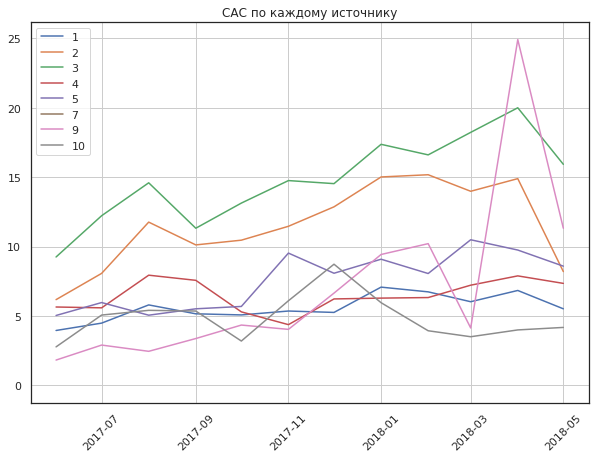

In [108]:
costs_source_gr = costs_source.pivot_table(index='source_id',
                                           columns='month',
                                           values='CAC',
                                           aggfunc='sum')

plt.figure(figsize=(10,7))
for i in range(costs_source_gr.shape[0]):
    plt.plot(costs_source_gr.iloc[i])
plt.legend(costs_source_gr.index)
plt.xticks(rotation=45)
plt.grid()
plt.title("CAC по каждому источнику");

**Вывод:** график показывает, что самые дорогие источники 3 и 2, остальные примерно равны между собой. Затраты на источник 9 резко возрастают в апреле - возможно была проведена какя-то акция. В целом, можно сказать, что затраты на привлечение клиентов возрастают в течение периода, хоть и наблюдаются колебания в отдельные месяцы.

#### Расчет ROMI по когортам в разрезе источников

Выведем таблицу с заказами (обновленную):

In [109]:
orders_new.head()

,buy_ts,revenue,uid,buy_month,buy_ts_month,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017-06,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017-06,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017-06,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017-06,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017-06,2017-06-01,2017-06-01


Посчитаем lifetime для распределения по когортам:

In [110]:
orders_new['lifetime'] = ((orders_new['order_month'] - orders_new['first_order_month']) 
                          / np.timedelta64(1,'M'))
orders_new['lifetime'] = orders_new['lifetime'].round().astype('int')
orders_new.head()

,buy_ts,revenue,uid,buy_month,buy_ts_month,order_month,first_order_month,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017-06,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017-06,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017-06,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017-06,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017-06,2017-06-01,2017-06-01,0


Сформируем табличку с пользователями и источниками по которым был совершено первое посещение на сайт

In [111]:
visits = visits.sort_values(by='start_ts')
uid_source = visits.groupby('uid')['source_id'].first()
uid_source.head()

uid
11863502262781     3
49537067089222     2
297729379853735    3
313578113262317    2
325320750514679    5
Name: source_id, dtype: int64

Соединим таблицы по пользователям:

In [112]:
orders_romi = pd.merge(orders_new, uid_source, on='uid')
orders_romi.head()

,buy_ts,revenue,uid,buy_month,buy_ts_month,order_month,first_order_month,lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,2017-06,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2017-06,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2017-06,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2017-06,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,2017-06,2017-06-01,2017-06-01,0,3


Сформируем когорты сразу по 3 признакам:

In [113]:
cohorts_romi = (orders_romi.groupby(
    ['first_order_month', 'source_id', 'lifetime']).agg(
    {'revenue': 'sum', 'uid': 'nunique'}).reset_index())

cohorts_romi.rename(
    columns={'source_id':'source','uid': 'uid_count'}, inplace=True)
cohorts_romi.head()

,first_order_month,source,lifetime,revenue,uid_count
0,2017-06-01,1,0,1378.70,190
1,2017-06-01,1,1,414.98,16
2,2017-06-01,1,2,419.43,10
3,2017-06-01,1,3,714.24,9
4,2017-06-01,1,4,811.20,12


Теперь нам необходимо рассчитать затраты на привлечение клиентов по месяцу в разрезе источников:

In [114]:
costs_time_new = costs.groupby(['month','source_id'])[
    ['costs']].sum().reset_index()
costs_time_new.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Внесем полученные данные по расходам на привлечение в наши когорты:

In [115]:
cohorts_romi = pd.merge(cohorts_romi, costs_time_new,
                        left_on=['first_order_month', 'source'], 
                        right_on=['month', 'source_id'])

cohorts_romi.drop('source_id', axis=1, inplace=True)
cohorts_romi.head()

,first_order_month,source,lifetime,revenue,uid_count,month,costs
0,2017-06-01,1,0,1378.70,190,2017-06-01,1125.61
1,2017-06-01,1,1,414.98,16,2017-06-01,1125.61
2,2017-06-01,1,2,419.43,10,2017-06-01,1125.61
3,2017-06-01,1,3,714.24,9,2017-06-01,1125.61
4,2017-06-01,1,4,811.20,12,2017-06-01,1125.61


Посчитаем количество пользователей:

In [116]:
users_count_new = cohorts_romi[cohorts_romi['lifetime'] == 0][
    ['first_order_month','source', 'uid_count']]
users_count_new = users_count_new.rename(
    columns = {'uid_count':'cohort_users'})
users_count_new.head()

,first_order_month,source,cohort_users
0,2017-06-01,1,190
12,2017-06-01,2,235
24,2017-06-01,3,638
36,2017-06-01,4,413
48,2017-06-01,5,384


Добавим данные по количеству пользователей в таблицу с когортами:

In [117]:
cohorts_romi_tot = pd.merge(cohorts_romi, users_count_new, on=[
    'first_order_month', 'source'])
cohorts_romi_tot.head()

,first_order_month,source,lifetime,revenue,uid_count,month,costs,cohort_users
0,2017-06-01,1,0,1378.70,190,2017-06-01,1125.61,190
1,2017-06-01,1,1,414.98,16,2017-06-01,1125.61,190
2,2017-06-01,1,2,419.43,10,2017-06-01,1125.61,190
3,2017-06-01,1,3,714.24,9,2017-06-01,1125.61,190
4,2017-06-01,1,4,811.20,12,2017-06-01,1125.61,190


- По условиям задачи - маржинальность = 100%.
- Найдем валовую прибыль.
- Рассчитаем LTV
- Вычислим САС
- Посчитаем ROMI

In [118]:
margin_rate = 1.0

cohorts_romi_tot['gp'] = cohorts_romi_tot['revenue'] * margin_rate
cohorts_romi_tot['ltv'] = cohorts_romi_tot['gp'] / cohorts_romi_tot['cohort_users']
cohorts_romi_tot['cac'] = cohorts_romi_tot['costs'] / cohorts_romi_tot['cohort_users']
cohorts_romi_tot['romi'] = cohorts_romi_tot['ltv'] / cohorts_romi_tot['cac']

cohorts_romi_tot.head()

,first_order_month,source,lifetime,revenue,uid_count,month,costs,cohort_users,gp,ltv,cac,romi
0,2017-06-01,1,0,1378.70,190,2017-06-01,1125.61,190,1378.70,7.256316,5.924263,1.224847
1,2017-06-01,1,1,414.98,16,2017-06-01,1125.61,190,414.98,2.184105,5.924263,0.368671
2,2017-06-01,1,2,419.43,10,2017-06-01,1125.61,190,419.43,2.207526,5.924263,0.372625
3,2017-06-01,1,3,714.24,9,2017-06-01,1125.61,190,714.24,3.759158,5.924263,0.634536
4,2017-06-01,1,4,811.20,12,2017-06-01,1125.61,190,811.20,4.269474,5.924263,0.720676


Построим тепловые карты для каждого источника с ROMI:

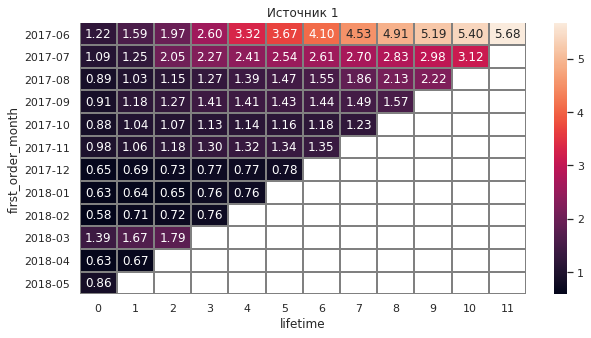

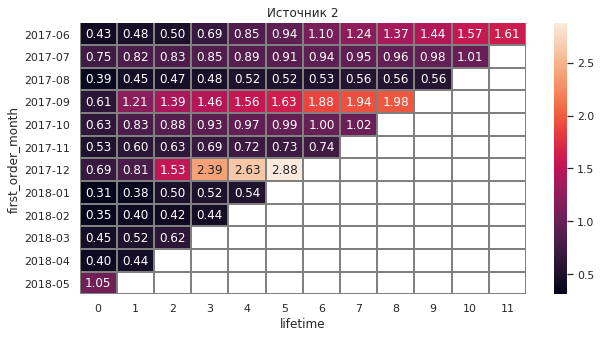

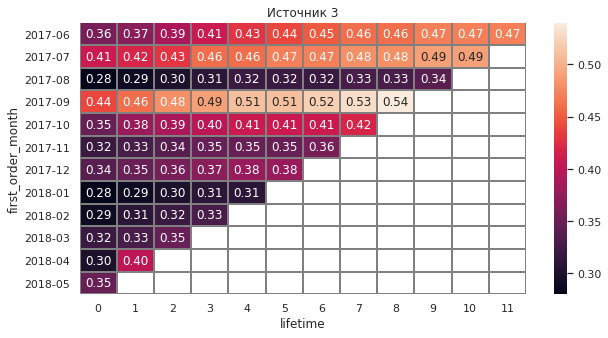

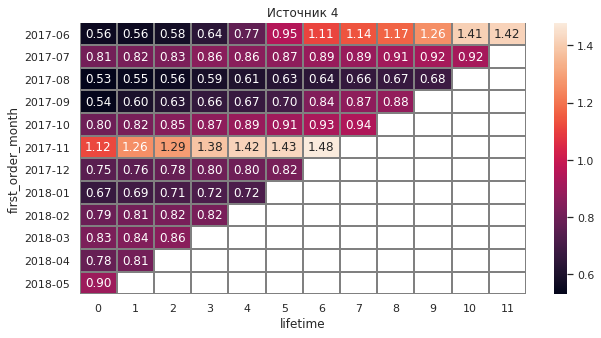

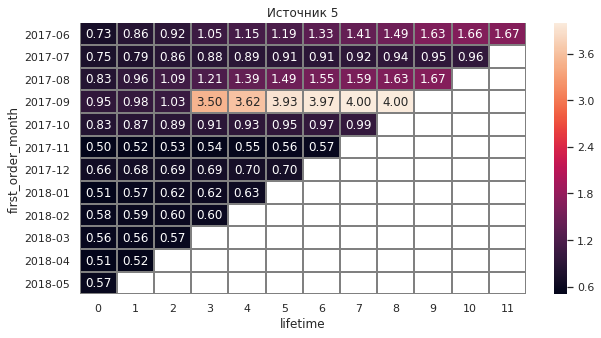

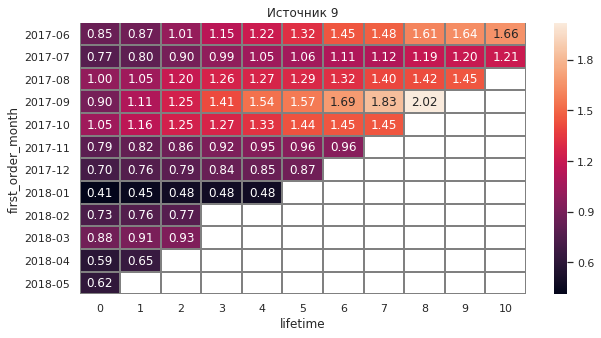

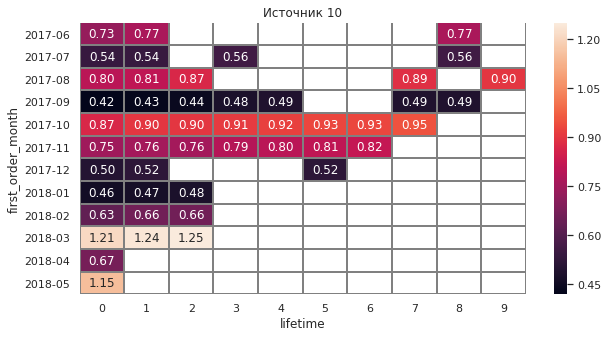

In [119]:
cohorts_romi_tot['first_order_month'] = cohorts_romi_tot['first_order_month'].dt.strftime('%Y-%m')

source_list = list(cohorts_romi_tot['source'].unique())

for i in source_list:
    data = cohorts_romi_tot[cohorts_romi_tot['source'] == i]
    data_tab = data.pivot_table(index='first_order_month',
                                columns='lifetime', 
                                values='romi').cumsum(axis=1).round(2)
    
    plt.figure(figsize=(10,5))
    plt.title('Источник ' + str(i))
    sns.heatmap(data_tab,
                annot=True,
                fmt='.2f',
                linewidths=1,
                linecolor='gray')

По графикам можно сказать, что
- самые лучшие источники это 1 и 9 - окупаются, в целом, меньше чем за полгода
- источники 2 и 5 окупаются в среднем к 7 месяцу, при этом есть удачные когорты, которые окупились гораздо раньше, так и единичные неудачные
- в источнике 4 окупилась только первая когорта (к полугоду), остальные колеблятся от 0,65 до 0,90
- источник 10 - не полные данные, из представленных - окупилась только 1 когорта.
- самый худший источник - 3 - за весь период не окупился и САС самый высокий

**Вывод:** Т.к 3 источник самый затратный и при этом не окупаемый - его необходимо больше исследовать, а в настоящий момент можно пердложить от него отказаться. Также необходимо подробнее рассмотреть источник 2, т.к он достаточно дороггой и приэтом не очень бодро окупается. Стоит обратить внимание на источники 1 и 9 - в плане цены они примерно на среднем уровне, зато имеют самую высокую окупаемость.

## Вывод и рекомендации

- Самые лучшие источники трафика, как показало исследование - это 1 и 9, т.к они довольно быстро окупаются (меньше чем за полгода - ROMI), на привлечение клиентов (САС) по отношению к другим источникам, в них относительно средние расходы.
- В ходе исследвания мы выяснили, что пользователи больше обращаются к сайту с октября по май и чаще в будни, чем в выходные, вероятно это связано с периодами отпусков и собственно выходных дней - время, когда люди могут выезжать на природу или оказываться в местах с плохой связью.
- Также мы вяснили, что пользователи чаще всего покупают услуги в первые 15 минут, что говорит о том, что либо они перешли на сайт непосредственно для покупки, либо делают выбор и оплачивают его, а вот возвращается довольно мало людей.
- Одна из самых перспективных когорт - июньская, возможно это связано с какими-то управленческими решениями, т.к. далее когорты в среднем имеют показатели возврата клиентов несколько меньше.
- Самые окупаемые источники привлечения клиентов 1 и 9 - быстро окупаются и расходы на них средние.
- Источник 3 - требует дополнительного исследования, однако на данный момент стоит рассмотреть возможность отказаться от него, т.к это направление себя не окупает.
- Источник 10 также стоит рассмотреть подробнее, т.к. по нему мало данных и в среднем, он также не окупается.

**Вывод:**
- данные, в целом, хорошие, пропусков нет, однако, необходимо было привести названия столбцов к одному виду (нижний регистр и нижнее подчеркивание вместо пробелов), дубликатов нет. Проверено вхождение данных в указанный временной период, выявленное несоответствие в таблице orders (покупка в июне 2018 г.) успешно удалено.

    Количество уникальных пользователей в среднем:
- в день 907 чел.
- в неделю 5716 чел.
- в месяц 23228 чел.

    В среднем 987.36 сессий в день.

    Исследование показало, что достаточно большое количество пользователей (около 90 тыс) переходят на сайт и совершают оплату за 1 минуту, можно сделать вывод, что такие люди уже сделали выбор мероприятия и используют сайт лишь с целью оплаты, в то время как, средняя пользовательская сессия, предположительно включающая выбор мероприятия и последующую его оплату длится примерно 16 минут.
    
В среднем, пользователь заходит на сайт за весь период 1,08 раз в день.

В целом можно сказать, что процент возвращения посетителей очень мал - не больше 9%, т.е люди довольно редко возвращаются, также мы видим, что в первой когорте (июньской) процент возвращений хоть и снижается, однако, он относительно стабилен. А в остальных когортах процент возврата снижается сильнее до 2-2,5%, т.е в половину ниже, чем в первой когорте. Еще можно сказать, что в марте и апреле даже в первый месяц, процент возвращений ниже, чем в остальных когортах, это может быть связано с какими-то неверными решениями, например выбором рекламного источника. 
    
Обращает на себя внимание то, что прослеживается тенденция - 2 дня - чуть ниже спрос на мероприятия, далее 5 дней чуть выше, например 11 и 12 ноября, затем через 5 дней - 18 и 19 ноября, 13 и 14 января и тд. Если свериться с календарем, то это выходные. Таким образом, можно предположить, что в выходные, в среднем, новых пользователей чуть меньше, чем в будни.

Интересно, что ярко выделяются по спросу на мероприятия некоторые периоды, например, 47 неделя, можно предположить, что на эту неделю (20-26 ноября) выпадали каникулы, а может, была проведена какая-то интересная акция, тогда вполне объясним такой взрыв интереса, или - 24 ноября, неизвестно, что это было, можно только предположить, что это какая-то акция или "ночь кино". Также стоит отметить, что на 52ю неделю 2017г и 1ю неделю января приходится относительный спад новых пользователей, по сравнению с остальным периодом подъема, возможно, это связано с тем, что у нас принято больше гулять на новогодних каникулах или уезжать загород, где не всегда есть связь.
    По такому же принципу можно объяснить спад количества новых пользователей на 18 и 19 неделях 2018 года - это период майских праздников, когда многие выезжают на природу, дачи. В ходе исследования мы выяснили, что пользователи больше обращаются к сайту с октября по май и чаще в будни, чем в выходные, вероятно это связано с периодами отпусков и собственно выходных дней - время, когда люди могут выезжать на природу или оказываться в местах с плохой связью.
    
Можно сказать, что в 1, 4 и 7 когортах наблюдается повышенный спрос на услуги сайта в 4й месяц жизни, если перевести на календарь, то получим сентябрь - для 1й когорты, предновогодний период для 4й когорты и март для 7 когорты - похоже на проведение праздничных акций, посвященных началу учебного года (или окончание отпусков), предстоящему новому году и 8 марта соответственно.
    
В декабре мы видим пик спроса на мероприятия, связанный вероятно с предновогодними шоу, а провал в апреле, видимо связан с временными системными неполадками на сайте или на отдельной платформе, т.к. провал уходит не в "0", а спускается до 1 посещения в день, значит посещения в этот период всё же были.
    
Самая низкая выручка наблюдается в июне 2017 года - это говорит о том, что в начале лета люди чаще стремятся в отпуска, а значит выезжают за пределы города - снижается спрос на мероприятия. Примерно то, же можно сказать о снижении выручки за январь 2018 года - это может быть за счет периода январских каникул, когда пользователи отдыхают за пределами города либо в связи с финансовыми трудностями, т.к потратились на предновогодние мероприятия, новогодние подарки и праздники.
    
Среднее количество покупок на одного покупателя за 6 мес.: 1.44
    
Средний чек за весь период: 4.96, среднее количество покупок на одного пользователя по когортам с течением времени возрастает.
    
Если рассматривать метрику LTV, то обращает на себя внимание:
- 1 когорта - её значения стабильно повышаются
- 4 когорта - самый высокий LTV с декабря 2017 года и далее стабильно растет
- 7 когорта - она меньше выделяется, чем первые две, однако имеет прирост LTV чуть выше, чем остальные когорты
- остальные когорты, в среднем имеют стабильный, хоть и невысокий прирост LTV
    
Средний LTV по когортам за 6 месяцев: 7.97 у.е, самая перспективная когорта - июньская - в четвертом квартале её показатели в среднем - 2 покупки на пользователя.
    
Средний САС на одного покупателя для всего проекта: 9.01 у.е.
    
По трафику самые дорогие источники 3 и 2, остальные примерно равны между собой. Затраты на источник 9 резко возрастают в апреле - возможно была проведена какая-то акция. В целом, можно сказать, что затраты на привлечение клиентов возрастают в течение периода, хоть и наблюдаются колебания в отдельные месяцы.
    
По времени также источник 3 сильно изменяется - траты сильно возрастают с сентября по апрель, в остальных источниках также траты возрастают в тот же период, однако, рост менее интенсивный.
    
- Источник 3 - требует дополнительного исследования, однако на данный момент стоит рассмотреть возможность отказаться от него, т.к это направление себя не окупает. 
- Источник 10 также стоит рассмотреть подробнее, т.к. по нему мало данных и в среднем, он также не окупается.
- В целом, график суммарных расходов совпадает с расходами по источникам, исключая источник 3.
    
- Самые лучшие источники трафика, как показало исследование - это 1 и 9, т.к они довольно быстро окупаются (меньше чем за полгода - ROMI), на привлечение клиентов (САС) по отношению к другим источникам, в них относительно средние расходы.
    
**Общий вывод:**

- самая перспективная когорта - первая (июньская)
- самые перспективные источники трафика - 1 и 9
- на данный момент стоит рассмотреть возможность отказаться от источников 3 и 10, т.к. они требуют более детального исследования